Scikit-Learn - Feature Extraction from Text Data
====

- https://coderzcolumn.com/tutorials/machine-learning/feature-extraction-from-text-data-using-scikit-learn-sklearn


## Feature Extraction From Text Data

All of the machine learning libraries expect input in the form of floats and that also fixed length/dimensions. But in real life, we face data in different forms like text, images, audio, video, etc. We need to find a way to represent these forms of data as floats to be able to train learning algorithms based on them. In this tutorial, we'll be discussing how to convert free form text which can be of variable length to an array of floats (called feature extraction generally).

### Bag Of Words

We'll start with a simple method for representation of text data called a bag of words.

Here, we'll be assuming data has come to us as a single string for each instance(spam mail, book, new, etc.) of data. We'll split each instance to a list of tokens based on white space and then lowercase each word. We'll repeat this process for each of our instances in the dataset. At the end of the process, we'll have quite a big vocabulary of words from all instances.

Now looking at each of our samples we can tell how often it appears in vocabulary. We'll represent our string as a single vector of length the same as that of vocabulary and words from that string will be marked  `1s`  & all other entries will be  `0s`  in that vector. We'll repeat the process for each instance of data.

At the end of the process, we'll end up with an array of size  `(number_of_instance/samples x vocabulary_size)`  which will be quite a sparse array because the dictionary contains all possible words and each sentence will have few words from it.

It's called bag-of-words because the order of words is lost totally.

![](https://storage.googleapis.com/coderzcolumn/static/tutorials/machine_learning/bag_of_words.svg)

We'll start by importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import collections
import warnings
import re

import sklearn

warnings.filterwarnings("ignore")

%matplotlib inline

### Creating Sample Dataset
Below we have created a sample dataset of 3 strings which we'll be using for an explanation of our purpose.

In [2]:
X = ['Welcome to coderzcolumn. We will help you learn python',
     'Lets start our day by learning something new',
    'Learn from tutorials, learn from blogs. Keep learning till life ends. Its a long journey']

### Initializing Model & Fitting to Data
We'll be using a simple CounteVectorizer provided by scikit-learn for converting our list of strings to a list of tokens based on vocabulary.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()


### Transforming Data From Text to Floats

Once we have an initialized model and trained it with train data, we can then transform data to floats using the  `transform()`  method. We can also use the  `fit_transform()`  method available in an object to perform fitting and transforming data in one step if we want to combine them.

In [4]:
vectorized_input = vectorizer.transform(X)
vectorized_input.shape, vectorized_input, type(vectorized_input)

((3, 27),
 <3x27 sparse matrix of type '<class 'numpy.int64'>'
 	with 29 stored elements in Compressed Sparse Row format>,
 scipy.sparse.csr.csr_matrix)

Make a note that transformed input is returning sparse scipy array which is stored in CSR(Compressed Sparse Row) format. One can easily convert such array to numpy array and back.

In [5]:
vectorized_input.todense(), vectorized_input.toarray()

(matrix([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 1, 1, 1, 1],
         [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
          0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
          0, 1, 0, 0, 0, 0]], dtype=int64),
 array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
         0, 1, 1, 1, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
         0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 0, 0]], dtype=int64))

In [6]:
print(vectorizer.vocabulary_)

{'welcome': 24, 'to': 21, 'coderzcolumn': 2, 'we': 23, 'will': 25, 'help': 6, 'you': 26, 'learn': 10, 'python': 17, 'lets': 12, 'start': 19, 'our': 16, 'day': 3, 'by': 1, 'learning': 11, 'something': 18, 'new': 15, 'from': 5, 'tutorials': 22, 'blogs': 0, 'keep': 9, 'till': 20, 'life': 13, 'ends': 4, 'its': 7, 'long': 14, 'journey': 8}


In [7]:
print(vectorizer.get_feature_names())

['blogs', 'by', 'coderzcolumn', 'day', 'ends', 'from', 'help', 'its', 'journey', 'keep', 'learn', 'learning', 'lets', 'life', 'long', 'new', 'our', 'python', 'something', 'start', 'till', 'to', 'tutorials', 'we', 'welcome', 'will', 'you']



We can transform sparse array back to the original list of strings using the `inverse_transform()` method but we'll have lost our order of words in original sentences.

In [8]:
print(vectorizer.inverse_transform(vectorized_input))

[array(['coderzcolumn', 'help', 'learn', 'python', 'to', 'we', 'welcome',
       'will', 'you'], dtype='<U12'), array(['by', 'day', 'learning', 'lets', 'new', 'our', 'something',
       'start'], dtype='<U12'), array(['blogs', 'ends', 'from', 'its', 'journey', 'keep', 'learn',
       'learning', 'life', 'long', 'till', 'tutorials'], dtype='<U12')]


### List Of Other Important Parameters

We'll below list down other important parameters available in the  `CountVectorizer`  model which can help us with various purposes when extracting futures from text data.

**input**  - It accepts one of string values from list ['content', 'filename','file'].  `content`  expects list of  `strings/bytes`  as input.  `filename`  expects list of filename as input.`file`  expects list of file objects as input.  `default=content`

**encoding**  - If the list of bytes or files opened in binary mode are given as input then this parameter is used to decode data.  `default=utf-8`

**decode_error**  - It accepts string from list ['strict', 'ignore', 'replace'].  `strict`  will fail vectorizer if there is error when decoding byte sequence.`ignore`  will ignore characters where errors occur while decoding.  `replace`  will replace with suitable matching character if error occurs while decoding.`default=strict`.

**preprocessor**  - It accepts  `callable`  or  `None`  as value. We can create our own preprocessor function which takes as input string and performs preprocessing according to our need. We can add lemmatization, stemming, etc.  `default=None`

**tokenizer**  - It accepts  `callable`  or  `None`  as value. We can define our own function which will split words according to our needs.It's only useful when  `analyzer=word`  is set.  `default=None`

In [9]:
def user_defined_preprocessor(sample):
    """
    sample: It returns to one sample of data.
    returns: It returns string with special characters removed.
    It returns list of words with only english characters seprated by single white space.
    """
    return ' '.join(re.findall(r'\w+', sample)) ## \w captures [a-zA-Z0-9] chracters in data.

def user_defined_tokenizer(sample):
    """
    sample: It returns to one sample of data.
    returns: It first lowers each chracter in string and then split them by single white space.
    It then returns list of words.
    """
    return sample.lower().split(' ')

vectorizer = CountVectorizer(preprocessor=user_defined_preprocessor, tokenizer=user_defined_tokenizer)
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary', vectorizer.vocabulary_)

Vocabulary {'welcome': 25, 'to': 22, 'coderzcolumn': 3, 'we': 24, 'will': 26, 'help': 7, 'you': 27, 'learn': 11, 'python': 18, 'lets': 13, 'start': 20, 'our': 17, 'day': 4, 'by': 2, 'learning': 12, 'something': 19, 'new': 16, 'from': 6, 'tutorials': 23, 'blogs': 1, 'keep': 10, 'till': 21, 'life': 14, 'ends': 5, 'its': 8, 'a': 0, 'long': 15, 'journey': 9}



We can access preprocessor and tokenizer using `build_preprocessor()` and `build_tokenizer()` methods and `preprocessor` and `tokenizer` property of CountVectorizer object.

In [10]:
print(help(vectorizer.build_preprocessor()))
print()
print(help(vectorizer.build_tokenizer()))
print()
print('Preprocessor : ', vectorizer.preprocessor)
print()
print('Tokenizer : ',vectorizer.tokenizer)

Help on function user_defined_preprocessor in module __main__:

user_defined_preprocessor(sample)
    sample: It returns to one sample of data.
    returns: It returns string with special characters removed.
    It returns list of words with only english characters seprated by single white space.

None

Help on function user_defined_tokenizer in module __main__:

user_defined_tokenizer(sample)
    sample: It returns to one sample of data.
    returns: It first lowers each chracter in string and then split them by single white space.
    It then returns list of words.

None

Preprocessor :  <function user_defined_preprocessor at 0x0000021CD6D84C80>

Tokenizer :  <function user_defined_tokenizer at 0x0000021CD6D84D08>


**stop_words**  - It accepts string  `english`,  `list of words`  or  `None`  as value. It removes these words when performing tokenization hence it won't be available in final vocabulary. It's only applied when  `analyzer=word`.  `default=None`

**token_pattern**  - It refers to tokenization pattern which will decide what can be defined as one token(word). It's only applied when  `analyzer=word`.  `default='(?u)\\b\\w\\w+\\b'`

In [11]:
vectorizer = CountVectorizer(stop_words=['we','you', 'it','its','to','a','an', 'the', 'by'])
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', vectorizer.vocabulary_)

Vocabulary :  {'welcome': 20, 'coderzcolumn': 1, 'will': 21, 'help': 5, 'learn': 8, 'python': 15, 'lets': 10, 'start': 17, 'our': 14, 'day': 2, 'learning': 9, 'something': 16, 'new': 13, 'from': 4, 'tutorials': 19, 'blogs': 0, 'keep': 7, 'till': 18, 'life': 11, 'ends': 3, 'long': 12, 'journey': 6}


In [12]:
vectorizer = CountVectorizer(stop_words='english')
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', vectorizer.vocabulary_)

Vocabulary :  {'welcome': 16, 'coderzcolumn': 1, 'help': 4, 'learn': 6, 'python': 12, 'lets': 8, 'start': 13, 'day': 2, 'learning': 7, 'new': 11, 'tutorials': 15, 'blogs': 0, 'till': 14, 'life': 9, 'ends': 3, 'long': 10, 'journey': 5}


In [13]:
vectorizer = CountVectorizer(stop_words=None)
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', vectorizer.vocabulary_)

Vocabulary :  {'welcome': 24, 'to': 21, 'coderzcolumn': 2, 'we': 23, 'will': 25, 'help': 6, 'you': 26, 'learn': 10, 'python': 17, 'lets': 12, 'start': 19, 'our': 16, 'day': 3, 'by': 1, 'learning': 11, 'something': 18, 'new': 15, 'from': 5, 'tutorials': 22, 'blogs': 0, 'keep': 9, 'till': 20, 'life': 13, 'ends': 4, 'its': 7, 'long': 14, 'journey': 8}


Please make a note above how vocabulary is created with different use of  `stop_words`  values.

**ngram_range**  - It accepts tuple of (min_n, max_n) which refers to the minimum and maximum values to be considered for n-grams. It's explained further below in tutorial in-depth.  `default=(1,1)`

**analyzer**  - It accepts string from list ['word', 'char', 'char_wb'] as value. It decides what should be considered as one token( a word of a character).`default=word`

In [14]:
vectorizer = CountVectorizer(ngram_range=(2,3), analyzer='word', stop_words='english')
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', vectorizer.vocabulary_)

Vocabulary :  {'welcome coderzcolumn': 29, 'coderzcolumn help': 2, 'help learn': 8, 'learn python': 12, 'welcome coderzcolumn help': 30, 'coderzcolumn help learn': 3, 'help learn python': 9, 'lets start': 18, 'start day': 23, 'day learning': 4, 'learning new': 15, 'lets start day': 19, 'start day learning': 24, 'day learning new': 5, 'learn tutorials': 13, 'tutorials learn': 27, 'learn blogs': 10, 'blogs learning': 0, 'learning till': 16, 'till life': 25, 'life ends': 20, 'ends long': 6, 'long journey': 22, 'learn tutorials learn': 14, 'tutorials learn blogs': 28, 'learn blogs learning': 11, 'blogs learning till': 1, 'learning till life': 17, 'till life ends': 26, 'life ends long': 21, 'ends long journey': 7}


Please make a note above that we have considered only 2-words and 3-words as token while removing stop words.

In [15]:
vectorizer = CountVectorizer(ngram_range=(4, 5), analyzer='char', stop_words='english')
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', list(vectorizer.vocabulary_.items())[:20])

Vocabulary :  [('welc', 295), ('elco', 97), ('lcom', 150), ('come', 78), ('ome ', 212), ('me t', 176), ('e to', 88), (' to ', 39), ('to c', 273), ('o co', 200), (' cod', 6), ('code', 74), ('oder', 202), ('derz', 82), ('erzc', 105), ('rzco', 248), ('zcol', 307), ('colu', 76), ('olum', 206), ('lumn', 170)]


Please make a note above that we have considered only 4-characters and 5-characters as token while removing stop words. We are printing only 20 token to prevent output from flooding.

**max_futures**  - It accepts  `int`  or  `None`  as value. If an integer is provided then only that many top tokens according to token-frequency will be considered across the corpus. If  `vocabulary`  parameter described below has been given then this parameter is ignored.  `default=None`

**vocabulary**  - It accepts mapping(dict) or iterable as value. Mapping should be a dictionary with the key as token and value as indices. For iterable, it should be a list of (token, index) values.`default=None`

**Note:**  Document-frequency represents a total number of the document that contains term token/term.

In [16]:
vectorizer = CountVectorizer(max_features=10)
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', list(vectorizer.vocabulary_.items())[:20])

Vocabulary :  [('welcome', 9), ('to', 6), ('we', 8), ('learn', 2), ('start', 4), ('learning', 3), ('from', 1), ('tutorials', 7), ('blogs', 0), ('till', 5)]


In [17]:
vectorizer = CountVectorizer(vocabulary={'welcome':0,'tutorials':1, 'blogs':2})
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', list(vectorizer.vocabulary_.items())[:20])

Vocabulary :  [('welcome', 0), ('tutorials', 1), ('blogs', 2)]



**min_df**  - It accepts float value in range [0.0, 1.0]. It ignores all tokens whose document-frequency is lower than given value.  `default=1`

**max_df**  - It accepts float value in range [0.0, 1.0]. It ignores all tokens whose document-frequency is higher than given value.  `default=1.0`

In [18]:
vectorizer = CountVectorizer(min_df=0.25, max_df=0.75)
transformed_X = vectorizer.fit_transform(X)
print('Vocabulary : ', list(vectorizer.vocabulary_.items())[:20])

Vocabulary :  [('welcome', 24), ('to', 21), ('coderzcolumn', 2), ('we', 23), ('will', 25), ('help', 6), ('you', 26), ('learn', 10), ('python', 17), ('lets', 12), ('start', 19), ('our', 16), ('day', 3), ('by', 1), ('learning', 11), ('something', 18), ('new', 15), ('from', 5), ('tutorials', 22), ('blogs', 0)]


## tf-idf encoding

tf-idf (term frequency-inverse document frequency) is a type of transformation applied to bag-of-words tokens. It's kind of scaling which can help complete training fast.

The main idea behind scaling is that down weight words which occur in many documents because that kind of words will have less influence on natural processing tasks like document classification. It puts more emphasis on words that are less occurring giving them more weight than frequently occurring.

We'll below explain step by step of getting tf-idf though scikit-learn has direct implementation for it as well.

**Raw Term Frequency - tf(t,d):**  We already explained above raw term frequency and scikit-learn implementation  `CountVectorizer`  to get it.

**Normalized Term Frequency:**  Raw term frequency is normalized using l2-normalization which involves dividing normal term frequency  vv  by its vector's length  ||v||||v||  (Euclidean Norm).

vnorm=v||v||2=v(∑ni=1vi)1/2vnorm=v||v||2=v(∑i=1nvi)1/2

**document frequency - df(d,t):**  It represents a total number of the document that contains term t.

**inverse document frequency - idf(t):**  Formula for idf is given below based on document frequency.

idf(t)=lognddf(d,t)+1idf(t)=log⁡nddf(d,t)+1

**smooth_idf:**  Scikit-learn transformers have an attribute called  `smooth_idf`  which transforms  `idf`  formula mentioned above to below one.

idf(t)=log1+nd1+df(d,t)+1idf(t)=log⁡1+nd1+df(d,t)+1

**tf-idf:**  FInal formula based on above terms for tf-idf is given below

tf−idf(t,d)=tf(t,d)∗idf(t)

In [19]:
tf = vectorized_input.toarray()
normalized_tf = tf[2] / np.sqrt(np.sum(tf[2]**2))
print('Normalized Term Frequency of 3rd sample : \n',normalized_tf)

Normalized Term Frequency of 3rd sample : 
 [0.23570226 0.         0.         0.         0.23570226 0.47140452
 0.         0.23570226 0.23570226 0.23570226 0.47140452 0.23570226
 0.         0.23570226 0.23570226 0.         0.         0.
 0.         0.         0.23570226 0.         0.23570226 0.
 0.         0.         0.        ]


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=False, norm='l2', smooth_idf=False)
tf_normalized = tfidf.fit_transform(tf).toarray()
print('Normalized Term Frequency of 3rd sample : \n', tf_normalized[2])

Normalized Term Frequency of 3rd sample : 
 [0.23570226 0.         0.         0.         0.23570226 0.47140452
 0.         0.23570226 0.23570226 0.23570226 0.47140452 0.23570226
 0.         0.23570226 0.23570226 0.         0.         0.
 0.         0.         0.23570226 0.         0.23570226 0.
 0.         0.         0.        ]


In [21]:
n_docs = len(X)
tf_welcome = 1
df_welcome = 1
inverse_df_welcome = (np.log(n_docs / df_welcome) + 1)
print('idf of "welcome" : ',tf_welcome * inverse_df_welcome)

tf_learn = 3
df_learn = 2
inverse_df_learn = (np.log(n_docs / df_learn) + 1)
print('idf of "learn" : ', tf_learn * inverse_df_learn)

idf of "welcome" :  2.09861228866811
idf of "learn" :  4.216395324324493


In [22]:
tfidf = TfidfTransformer(norm=None,smooth_idf=False,use_idf=True)
tf_idf = tfidf.fit_transform(tf).toarray()

In [23]:
tfidf.idf_

array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       1.40546511, 1.40546511, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229])

In [24]:
tf_idf[2]

array([2.09861229, 0.        , 0.        , 0.        , 2.09861229,
       4.19722458, 0.        , 2.09861229, 2.09861229, 2.09861229,
       2.81093022, 1.40546511, 0.        , 2.09861229, 2.09861229,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       2.09861229, 0.        , 2.09861229, 0.        , 0.        ,
       0.        , 0.        ])

Let’s use the  `TfidfVectorizer`  class of scikit-learn for generating tf-idfs.

**Note:**  Please make a note that  `TfidfTransformer`  works on term frequency array generated through  `CountVectorizer`  and  `TfidfVectorizer`  works directly on the original list of strings.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(norm=None,smooth_idf=False,use_idf=True)
tf_idf = tfidf_vect.fit_transform(X).toarray()
tf_idf[2]

array([2.09861229, 0.        , 0.        , 0.        , 2.09861229,
       4.19722458, 0.        , 2.09861229, 2.09861229, 2.09861229,
       2.81093022, 1.40546511, 0.        , 2.09861229, 2.09861229,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       2.09861229, 0.        , 2.09861229, 0.        , 0.        ,
       0.        , 0.        ])

In [26]:
n_docs = len(X)
tf_welcome = 1
df_welcome = 1
inverse_df_welcome = (np.log( (1+n_docs) / (1+df_welcome)) + 1)
print('idf of "welcome" : ',tf_welcome * inverse_df_welcome)

tf_learn = 3
df_learn = 2
inverse_df_learn = (np.log((1+n_docs) / (1+df_learn)) + 1)
print('idf of "learn" : ', tf_learn * inverse_df_learn)

idf of "welcome" :  1.6931471805599454
idf of "learn" :  3.8630462173553424


In [27]:
tfidf_vect = TfidfVectorizer(norm=None) ## Tfidf with no normalization. It'll be using idf and smoothing of idf though.
tf_idf = tfidf_vect.fit_transform(X).toarray()
tf_idf[2]

array([1.69314718, 0.        , 0.        , 0.        , 1.69314718,
       3.38629436, 0.        , 1.69314718, 1.69314718, 1.69314718,
       2.57536414, 1.28768207, 0.        , 1.69314718, 1.69314718,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.69314718, 0.        , 1.69314718, 0.        , 0.        ,
       0.        , 0.        ])

In [28]:
tfidf_vect = TfidfVectorizer() ## tfidf with l2 normalization, using idf and smoothing idf as well
tf_idf = tfidf_vect.fit_transform(X).toarray()
tf_idf[2]

array([0.25084807, 0.        , 0.        , 0.        , 0.25084807,
       0.50169613, 0.        , 0.25084807, 0.25084807, 0.25084807,
       0.38155284, 0.19077642, 0.        , 0.25084807, 0.25084807,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25084807, 0.        , 0.25084807, 0.        , 0.        ,
       0.        , 0.        ])

### List Of Other Important Parameters

`TfidfVectorizer`  has most of the parameter the same as that of  `Countvectorizer`  which we have explained above in-depth. One can try the parameter values explained above with  `TfidfVectorizer`  as well to check results. Parameters that were specific to  `TfidfVectorizer`  have been already explained above with examples.

## Bigrams and N-Grams

Till now we have discussed only one-word tokens(1-gram - unigram) and totally discarded order of words. But this might not be always right as we might need to consider the order in some scenarios (like "not" can invert the meaning of the sentence).

A simple way to consider some order of words is to use n-grams. N-Grams does not look at single words but all pairs of possible neighbors.

2-grams can consist of all 2 words neighboring pairs with an overlap of 1 word. 3-grams can consist of all 3 words neighboring pairs with an overlap of 2 words.

-   Sample Text : "Lets learn something new today"
-   1-gram : "lets", "learn", "something", "new", "today"
-   2-gram : "lets learn", "learn something", "something new", "new today"
-   3-gram : "lets learn something", "learn something new", "something new today"

Deciding "n" to be used in n-gram is dependent on the application and can be used as one hyperparameter of the algorithm to be tuned.

In [29]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2)) ## N-gram with min lenght of 2 and max length of 2
bigram_vectorizer.fit(X)

CountVectorizer(ngram_range=(2, 2))

In [30]:
print(bigram_vectorizer.get_feature_names())

['blogs keep', 'by learning', 'coderzcolumn we', 'day by', 'ends its', 'from blogs', 'from tutorials', 'help you', 'its long', 'keep learning', 'learn from', 'learn python', 'learning something', 'learning till', 'lets start', 'life ends', 'long journey', 'our day', 'something new', 'start our', 'till life', 'to coderzcolumn', 'tutorials learn', 'we will', 'welcome to', 'will help', 'you learn']


In [31]:
bigram_vectorizer.transform(X).toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0]], dtype=int64)

In [32]:
print(bigram_vectorizer.vocabulary_)

{'welcome to': 24, 'to coderzcolumn': 21, 'coderzcolumn we': 2, 'we will': 23, 'will help': 25, 'help you': 7, 'you learn': 26, 'learn python': 11, 'lets start': 14, 'start our': 19, 'our day': 17, 'day by': 3, 'by learning': 1, 'learning something': 12, 'something new': 18, 'learn from': 10, 'from tutorials': 6, 'tutorials learn': 22, 'from blogs': 5, 'blogs keep': 0, 'keep learning': 9, 'learning till': 13, 'till life': 20, 'life ends': 15, 'ends its': 4, 'its long': 8, 'long journey': 16}


In [33]:
gram_vectorizer = CountVectorizer(ngram_range=(1, 2))
gram_vectorizer.fit(X)

CountVectorizer(ngram_range=(1, 2))

In [34]:
print(gram_vectorizer.get_feature_names())

['blogs', 'blogs keep', 'by', 'by learning', 'coderzcolumn', 'coderzcolumn we', 'day', 'day by', 'ends', 'ends its', 'from', 'from blogs', 'from tutorials', 'help', 'help you', 'its', 'its long', 'journey', 'keep', 'keep learning', 'learn', 'learn from', 'learn python', 'learning', 'learning something', 'learning till', 'lets', 'lets start', 'life', 'life ends', 'long', 'long journey', 'new', 'our', 'our day', 'python', 'something', 'something new', 'start', 'start our', 'till', 'till life', 'to', 'to coderzcolumn', 'tutorials', 'tutorials learn', 'we', 'we will', 'welcome', 'welcome to', 'will', 'will help', 'you', 'you learn']


In [35]:
gram_vectorizer.transform(X).toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [36]:
print(gram_vectorizer.vocabulary_)

{'welcome': 48, 'to': 42, 'coderzcolumn': 4, 'we': 46, 'will': 50, 'help': 13, 'you': 52, 'learn': 20, 'python': 35, 'welcome to': 49, 'to coderzcolumn': 43, 'coderzcolumn we': 5, 'we will': 47, 'will help': 51, 'help you': 14, 'you learn': 53, 'learn python': 22, 'lets': 26, 'start': 38, 'our': 33, 'day': 6, 'by': 2, 'learning': 23, 'something': 36, 'new': 32, 'lets start': 27, 'start our': 39, 'our day': 34, 'day by': 7, 'by learning': 3, 'learning something': 24, 'something new': 37, 'from': 10, 'tutorials': 44, 'blogs': 0, 'keep': 18, 'till': 40, 'life': 28, 'ends': 8, 'its': 15, 'long': 30, 'journey': 17, 'learn from': 21, 'from tutorials': 12, 'tutorials learn': 45, 'from blogs': 11, 'blogs keep': 1, 'keep learning': 19, 'learning till': 25, 'till life': 41, 'life ends': 29, 'ends its': 9, 'its long': 16, 'long journey': 31}


### Character N-Grams

Sometimes we want to create tokens of a list of characters of a particular length. Character N-Grams are generally used in language identification.

We can use  `analyzer="char"`  for generating character n-grams with  `CountVectorizer`  as we had described above.

In [37]:
char_vectorizer = CountVectorizer(ngram_range=(2, 2), analyzer="char")
char_vectorizer.fit(X)

CountVectorizer(analyzer='char', ngram_range=(2, 2))

In [38]:
print(char_vectorizer.get_feature_names())

[' a', ' b', ' c', ' d', ' e', ' f', ' h', ' i', ' j', ' k', ' l', ' n', ' o', ' p', ' s', ' t', ' w', ' y', ', ', '. ', 'a ', 'al', 'ar', 'ay', 'bl', 'by', 'co', 'da', 'de', 'ds', 'e ', 'ea', 'ee', 'el', 'en', 'ep', 'er', 'et', 'ew', 'ey', 'fe', 'fr', 'g ', 'gs', 'he', 'hi', 'ho', 'ia', 'if', 'il', 'in', 'it', 'jo', 'ke', 'l ', 'lc', 'le', 'li', 'll', 'lo', 'lp', 'ls', 'lu', 'm ', 'me', 'mn', 'n ', 'n.', 'nd', 'ne', 'ng', 'ni', 'o ', 'od', 'og', 'ol', 'om', 'on', 'or', 'ou', 'p ', 'py', 'r ', 'ri', 'rn', 'ro', 'rt', 'rz', 's ', 's,', 's.', 'so', 'st', 't ', 'ta', 'th', 'ti', 'to', 'ts', 'tu', 'u ', 'um', 'ur', 'ut', 'we', 'wi', 'y ', 'yo', 'yt', 'zc']


# SMS Spam Detection Case Study

We'll perform an SMS Spam classification task from the UCI ML data library. It'll help us explain the whole process of text feature extraction, feature selection, training model, evaluating the model and visualizing results.

## Flow of Whole Process

![](https://storage.googleapis.com/coderzcolumn/static/tutorials/machine_learning/pipeline_cross_validation.svg)

We'll first download data from the UCI ML data directory and then will perform classification by reading a file.

In [39]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
import pandas as pd
#data = pd.read_csv('data/spam.csv')
data = pd.read_csv('spam.csv',names=['target','data'],header=0)
data

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ฬ_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [41]:
#y, text = zip(*data)
y = data.target
text = data.data

In [42]:
collections.Counter(y)

Counter({'ham': 4825, 'spam': 747})

### Splitting Data into Train/Test Sets

Lets split our data into training(75%) and test sets(25%).

In [43]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

In [44]:
%%time
count_vectorizer = CountVectorizer()
count_vectorizer.fit(text_train)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_train)

X_train_cnt = count_vectorizer.transform(text_train)
X_test_cnt = count_vectorizer.transform(text_test)

X_train_tfidf = tfidf_vectorizer.transform(text_train)
X_test_tfidf = tfidf_vectorizer.transform(text_test)


print(X_train_cnt.shape, X_test_cnt.shape, X_train_tfidf.shape, X_test_tfidf.shape)

(4179, 7494) (1393, 7494) (4179, 7494) (1393, 7494)
Wall time: 473 ms


In [45]:
from sklearn.linear_model import LogisticRegression

clf_cnt = LogisticRegression()
print(clf_cnt.fit(X_train_cnt, y_train))

clf_tfidf = LogisticRegression()
print(clf_tfidf.fit(X_train_tfidf, y_train))

LogisticRegression()
LogisticRegression()


In [46]:
print('Count Vectorizer Performance : %.3f'%clf_cnt.score(X_test_cnt, y_test))
print('TfIdf Vectorizer Performance : %.3f'%clf_tfidf.score(X_test_cnt, y_test))

Count Vectorizer Performance : 0.979
TfIdf Vectorizer Performance : 0.933


In [47]:

print('Count Vectorizer Performance : %.3f'%clf_cnt.score(X_test_tfidf, y_test))
print('TfIdf Vectorizer Performance : %.3f'%clf_tfidf.score(X_test_tfidf, y_test))

Count Vectorizer Performance : 0.866
TfIdf Vectorizer Performance : 0.972



### Visualize Important features Generated By Vectorizers

Let’s visualize  `most important`  20 features and  `least important`  20 features. Least important features will be mostly repeated words in almost every other sentence like "the", "me", "at" etc.

Most important words will be the ones that occur quite less compared to the least important which occurs quite often as it'll be mostly words required in sentence formation.

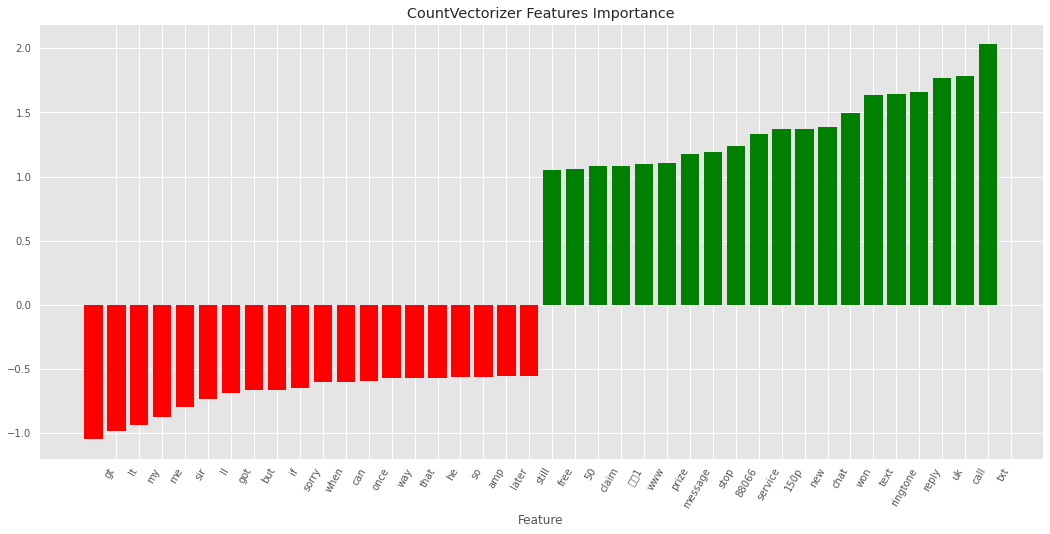

In [48]:
coef = clf_cnt.coef_.ravel()
positive_coeffs = np.argsort(coef)[-20:]
negative_coeffs = np.argsort(coef)[:20]
interesting_coeffs = np.hstack([negative_coeffs, positive_coeffs])
# plot them
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(18, 8))
    colors = ["red" if c < 0 else "green" for c in coef[interesting_coeffs]]
    plt.bar(np.arange(2 * 20), coef[interesting_coeffs], color=colors)
    feature_names = np.array(count_vectorizer.get_feature_names())
    plt.xticks(np.arange(1, 2 * 20 + 1), feature_names[interesting_coeffs], rotation=60, ha="right")
    plt.xlabel('Feature Importance')
    plt.xlabel('Feature')
    plt.title('CountVectorizer Features Importance')

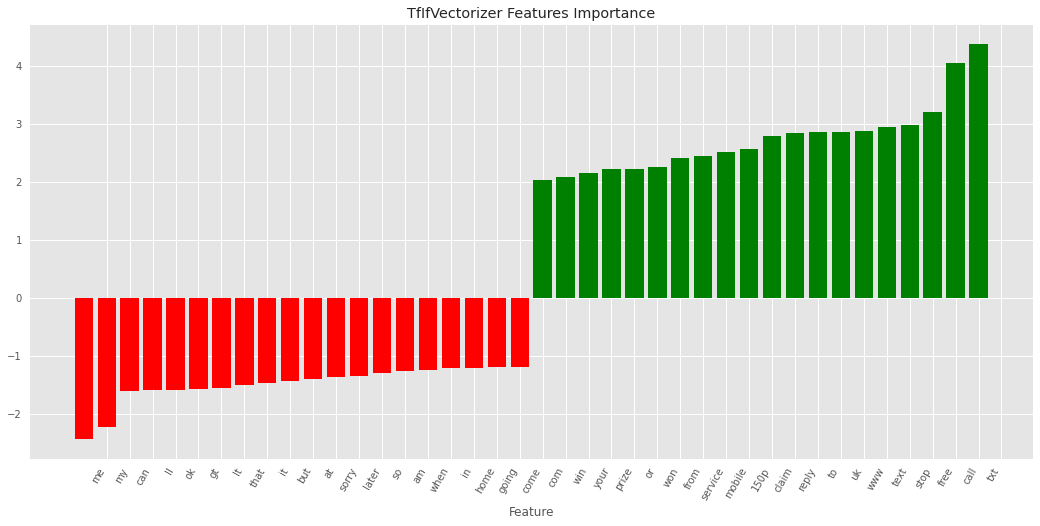

In [49]:
coef = clf_tfidf.coef_.ravel()
positive_coeffs = np.argsort(coef)[-20:]
negative_coeffs = np.argsort(coef)[:20]
interesting_coeffs = np.hstack([negative_coeffs, positive_coeffs])
# plot them
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(18, 8))
    colors = ["red" if c < 0 else "green" for c in coef[interesting_coeffs]]
    plt.bar(np.arange(2 * 20), coef[interesting_coeffs], color=colors)
    feature_names = np.array(tfidf_vectorizer.get_feature_names())
    plt.xticks(np.arange(1, 2 * 20 + 1), feature_names[interesting_coeffs], rotation=60, ha="right")
    plt.xlabel('Feature Importance')
    plt.xlabel('Feature')
    plt.title('TfIfVectorizer Features Importance')